In [58]:
%matplotlib inline
from __future__ import print_function, division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pickle
from random import sample

## Load in the Signal Dataset
First I make a header list to name the columns in the dataset. This header will be used for the background as well. Then Pandas is used to read in the data.

In [59]:
raw_header = list(itertools.chain.from_iterable(
    [[n.format(i) for n in 
      ["Pt {}", "Eta {}", "Phi {}", "Mass {}", "Charge {}", "DeepCSVprobb {}", "DeepCSVprobbb {}", "DeepCSVprobc {}",
       "DeepCSVprobudsg {}", "qgid {}"]]
     for i in range(1, 4)]))

header = ["Class"] + raw_header + ["Top Mass", "Top Pt", "Top ptDR", "W Mass", "W ptDR", "soft drop n2",
                                   "j2 ptD", "j3 ptD", "(b, j2) mass", "(b, j3) mass"]

In [60]:
signal = pd.read_csv("ttH_hadT_signal.csv", header=None, names=header)

In [61]:
print(signal.shape)
signal.head()

(429697, 41)


,Class,Pt 1,Eta 1,Phi 1,Mass 1,Charge 1,DeepCSVprobb 1,DeepCSVprobbb 1,DeepCSVprobc 1,DeepCSVprobudsg 1,...,Top Mass,Top Pt,Top ptDR,W Mass,W ptDR,soft drop n2,j2 ptD,j3 ptD,"(b, j2) mass","(b, j3) mass"
0,1,54.9391,-0.387515,2.596180,9.09433,-0.492791,0.021769,0.000346,0.072085,0.905799,...,170.650,111.958,0,94.1101,182.136,0.117141,-5.337360,0.634885,77.2379,120.5250
1,1,79.2143,-0.624282,-0.120407,12.55650,0.040502,0.035599,0.000430,0.109662,0.854310,...,204.182,249.989,0,122.9760,223.844,0.230085,-1.183450,-1.154050,90.3804,138.9080
2,1,65.6465,-0.220677,-0.866956,12.24890,-0.116391,0.017675,0.000251,0.088817,0.893258,...,148.673,153.252,0,104.7860,170.507,0.085308,11.981500,-0.631879,79.2444,73.2155
3,1,62.0283,0.625972,-2.616530,9.73203,-0.169099,0.020707,0.000175,0.110877,0.868242,...,165.222,174.999,0,119.5080,221.318,0.072613,-0.643411,0.938953,83.3429,79.7735
4,1,271.4520,1.438020,-2.290610,39.45580,-0.833393,0.029839,0.001898,0.089722,0.878541,...,148.382,341.491,0,60.8186,107.650,0.162998,1.574420,4.350240,97.6015,102.5260


### Look at the Invariant Mass Distribution for the Signal

172.58411729404673


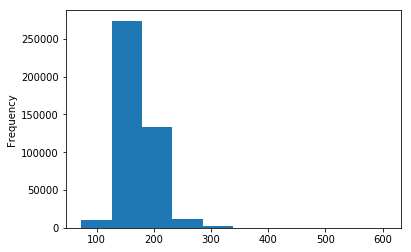

In [62]:
smass = signal["Top Mass"]
smass.plot.hist()
print(smass.mean())

## Load in the Background Dataset
Use Pandas to load in the background data.

In [66]:
bkgd = pd.read_csv("ttH_hadT_bkgd.csv", header=None, names=header)

In [67]:
print(bkgd.shape)
bkgd.head()

(384407, 41)


,Class,Pt 1,Eta 1,Phi 1,Mass 1,Charge 1,DeepCSVprobb 1,DeepCSVprobbb 1,DeepCSVprobc 1,DeepCSVprobudsg 1,...,Top Mass,Top Pt,Top ptDR,W Mass,W ptDR,soft drop n2,j2 ptD,j3 ptD,"(b, j2) mass","(b, j3) mass"
0,0,83.1083,-1.157930,-0.477622,7.54454,0.252836,0.027005,0.000177,0.167173,0.805645,...,424.988,88.6775,0.0,287.612,444.904,0.039887,-0.758943,0.634885,275.1180,150.6930
1,0,54.9391,-0.387515,2.596180,9.09433,-0.492791,0.021769,0.000346,0.072085,0.905799,...,318.512,195.7890,0.0,275.118,417.530,0.034481,-1.737990,-0.758943,146.4740,69.3057
2,0,83.1083,-1.157930,-0.477622,7.54454,0.252836,0.027005,0.000177,0.167173,0.805645,...,330.529,178.9910,0.0,138.260,344.584,0.082616,-0.758943,-0.795796,275.1180,122.1260
3,0,83.1083,-1.157930,-0.477622,7.54454,0.252836,0.027005,0.000177,0.167173,0.805645,...,319.975,152.6180,0.0,128.485,333.026,0.076242,-12.122600,-0.758943,103.1710,275.1180
4,0,83.1083,-1.157930,-0.477622,7.54454,0.252836,0.027005,0.000177,0.167173,0.805645,...,326.202,130.6350,0.0,160.118,444.399,0.029962,-5.337360,-0.758943,74.4996,275.1180


### Look at the Invariant Mass Distribution for the Background

298.3431002411513


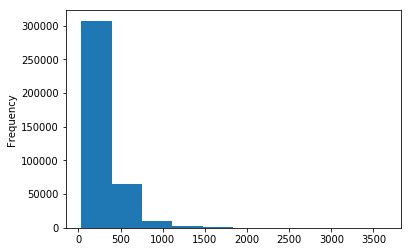

In [68]:
bmass = bkgd["Top Mass"]
bmass.plot.hist()
print(bmass.mean())

## Invariant Mass Cut
Here we take a first look at the signal compared to the background for the invariant mass, with the background scaled down since it is much larger. There is a clear opportunity to cut high mass events and retain high efficiency on the signal. After playing around a little, these cuts were determined to be $99\%$ efficient in the range $m_{top} \in [96, 266]$ GeV. The next plot shows the distribution after making the cuts, unscaled.

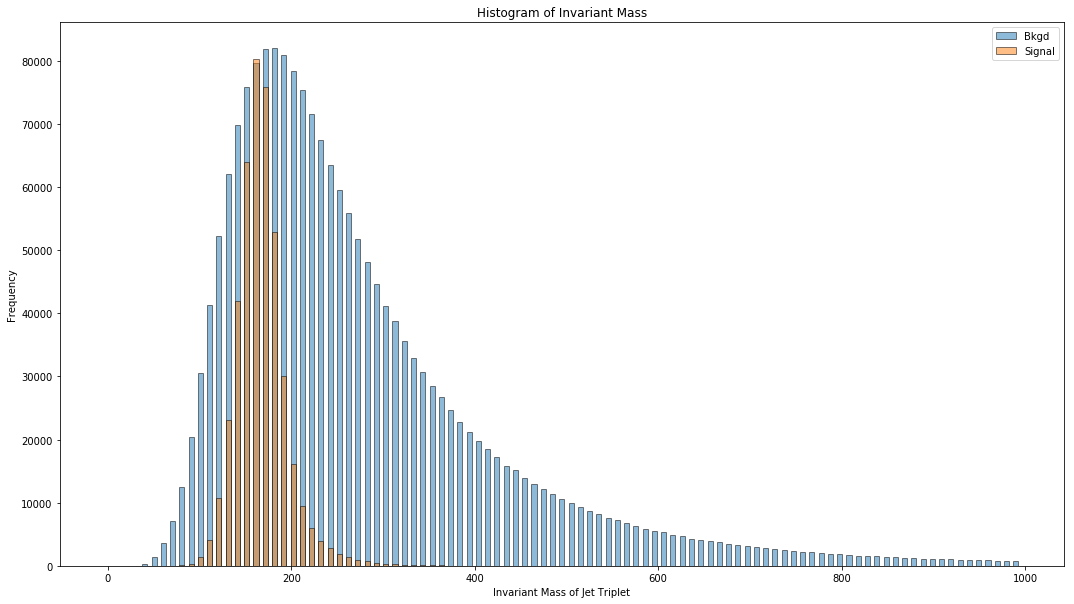

In [15]:
fig, ax = plt.subplots()
bins = np.linspace(0, 1000, 100)
bhist = np.histogram(bmass, bins=bins)
shist = np.histogram(smass, bins=bins)
plt.bar(bhist[1][:-1], bhist[0]/2.3, width=5.5, alpha=0.5, label="Bkgd", edgecolor="black")
plt.bar(shist[1][:-1], shist[0], width=5.5, alpha=0.5, label="Signal", edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("Invariant Mass of Jet Triplet")
ax.set_title("Histogram of Invariant Mass")
plt.legend(loc='upper right')
fig.set_size_inches(18, 10)

In [16]:
smass.min(), smass.max()

(72.6429, 605.1709999999999)

In [17]:
# Make cuts at 96 & 266 GeV
((smass > 96) & (smass < 266)).sum()*100/smass.count()

99.01302545747352

In [18]:
# Make cuts at 96 & 266 GeV
cut_signal = signal[((signal["Top Mass"] > 96) & (signal["Top Mass"] < 266))]
cut_bkgd = bkgd[((bkgd["Top Mass"] > 96) & (bkgd["Top Mass"] < 266))]

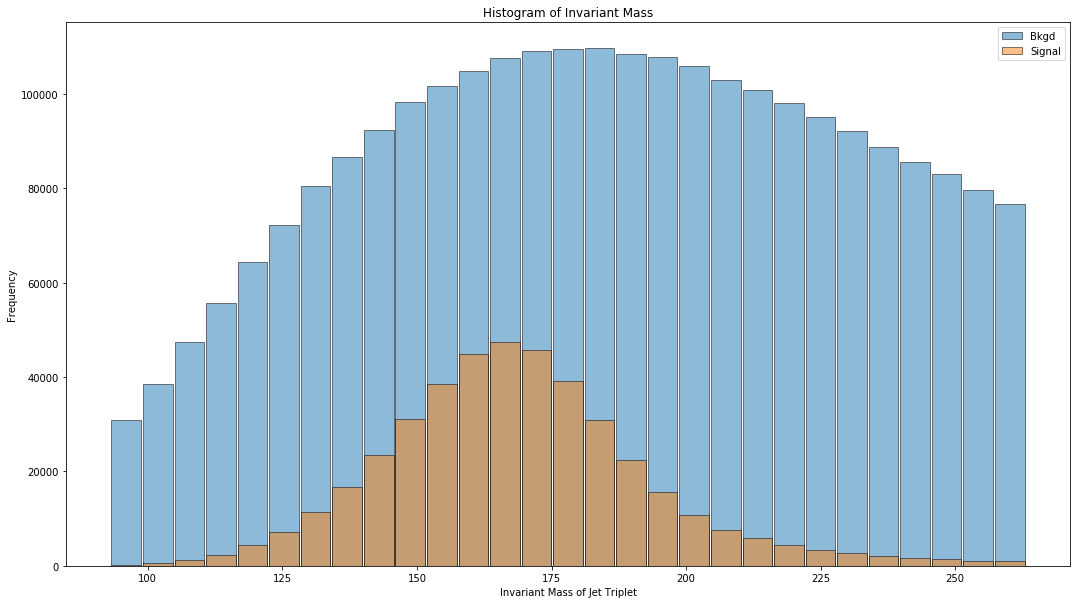

In [19]:
fig, ax = plt.subplots()
bins = np.linspace(96, 266, 30)
bhist = np.histogram(cut_bkgd["Top Mass"], bins=bins)
shist = np.histogram(cut_signal["Top Mass"], bins=bins)
plt.bar(bhist[1][:-1], bhist[0], width=5.5, alpha=0.5, label="Bkgd", edgecolor="black")
plt.bar(shist[1][:-1], shist[0], width=5.5, alpha=0.5, label="Signal", edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("Invariant Mass of Jet Triplet")
ax.set_title("Histogram of Invariant Mass")
plt.legend(loc='upper right')
fig.set_size_inches(18, 10)

## Save the Datasets as Training, Validation, and Testing Sets to Facilitate Easy Use in PyTorch and Scikit Learn
#### Dataset Fractions:
- Training: 65%
- Validation: 15%
- Testing: 20%

#### Even out the signal and background

In [20]:
sig_size = cut_signal.shape[0]
bkgd_size = cut_bkgd.shape[0]
# Assume sig_size < bkgd_size
subsample = sample(xrange(bkgd_size), sig_size)
cut_bkgd = cut_bkgd.iloc[subsample, :]

#### Make the different sets

In [24]:
ix_train_cut = int(0.6*sig_size)
ix_val_cut = ix_train_cut + int(0.15*sig_size)
df_train_X = pd.concat((cut_signal.iloc[:ix_train_cut, 1:], cut_bkgd.iloc[:ix_train_cut, 1:]))
df_train_y = pd.concat((cut_signal.iloc[:ix_train_cut, 0], cut_bkgd.iloc[:ix_train_cut, 0]))
df_val_X = pd.concat((cut_signal.iloc[ix_train_cut:ix_val_cut, 1:], cut_bkgd.iloc[ix_train_cut:ix_val_cut, 1:]))
df_val_y = pd.concat((cut_signal.iloc[ix_train_cut:ix_val_cut, 0], cut_bkgd.iloc[ix_train_cut:ix_val_cut, 0]))
df_test_X = pd.concat((cut_signal.iloc[ix_val_cut:, 1:], cut_bkgd.iloc[ix_val_cut:, 1:]))
df_test_y = pd.concat((cut_signal.iloc[ix_val_cut:, 0], cut_bkgd.iloc[ix_val_cut:, 0]))

In [25]:
pd.concat((df_train_y, df_train_X), axis=1).to_csv("ttH_hadT_cut_train.csv")
pd.concat((df_val_y, df_val_X), axis=1).to_csv("ttH_hadT_cut_val.csv")
pd.concat((df_test_y, df_test_X), axis=1).to_csv("ttH_hadT_cut_test.csv")

In [26]:
pd.concat((df_train_y, df_train_X.loc[:, raw_header]), axis=1).to_csv("ttH_hadT_cut_raw_train.csv")
pd.concat((df_val_y, df_val_X.loc[:, raw_header]), axis=1).to_csv("ttH_hadT_cut_raw_val.csv")
pd.concat((df_test_y, df_test_X.loc[:, raw_header]), axis=1).to_csv("ttH_hadT_cut_raw_test.csv")

## Look for Cuts
Now that I have generated all of the engineered variables we need to look at all of the signal vs. background distributions to see if there are any easy cuts that could be made. This also allows us to roughly rank the importance of the variables by looking at their discriminating power.

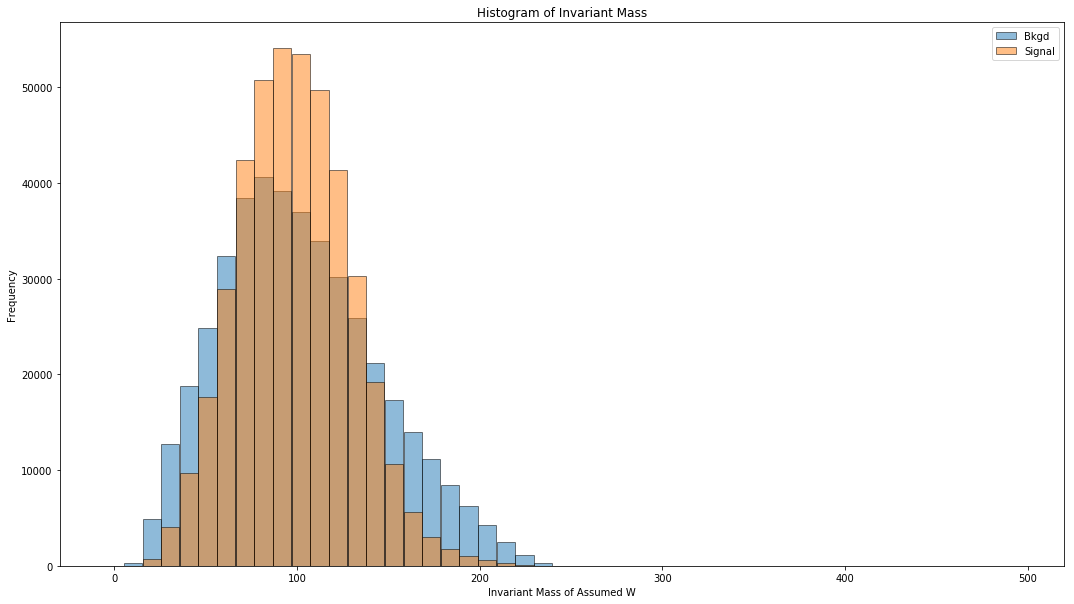

In [27]:
fig, ax = plt.subplots()
bins = np.linspace(0, 500, 50)
bhist = np.histogram(cut_bkgd["W Mass"], bins=bins)
shist = np.histogram(cut_signal["W Mass"], bins=bins)
plt.bar(bhist[1][:-1], bhist[0], width=10, alpha=0.5, label="Bkgd", edgecolor="black")
plt.bar(shist[1][:-1], shist[0], width=10, alpha=0.5, label="Signal", edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("Invariant Mass of Assumed W")
ax.set_title("Histogram of Invariant Mass")
plt.legend(loc='upper right')
fig.set_size_inches(18, 10)

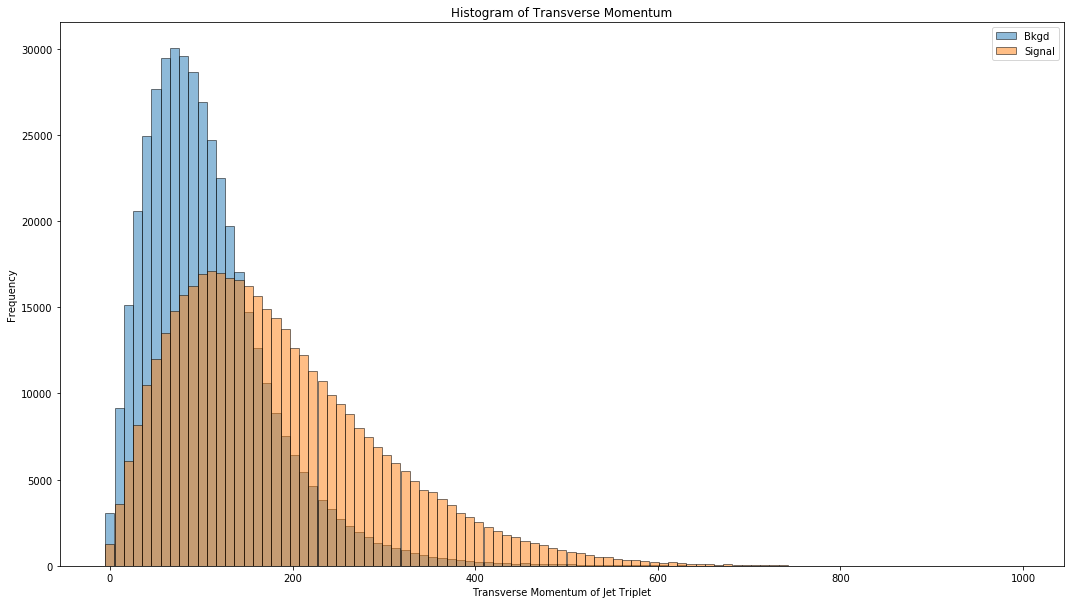

In [28]:
fig, ax = plt.subplots()
bins = np.linspace(0, 1000, 100)
bhist = np.histogram(cut_bkgd["Top Pt"], bins=bins)
shist = np.histogram(cut_signal["Top Pt"], bins=bins)
plt.bar(bhist[1][:-1], bhist[0], width=10, alpha=0.5, label="Bkgd", edgecolor="black")
plt.bar(shist[1][:-1], shist[0], width=10, alpha=0.5, label="Signal", edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("Transverse Momentum of Jet Triplet")
ax.set_title("Histogram of Transverse Momentum")
plt.legend(loc='upper right')
fig.set_size_inches(18, 10)

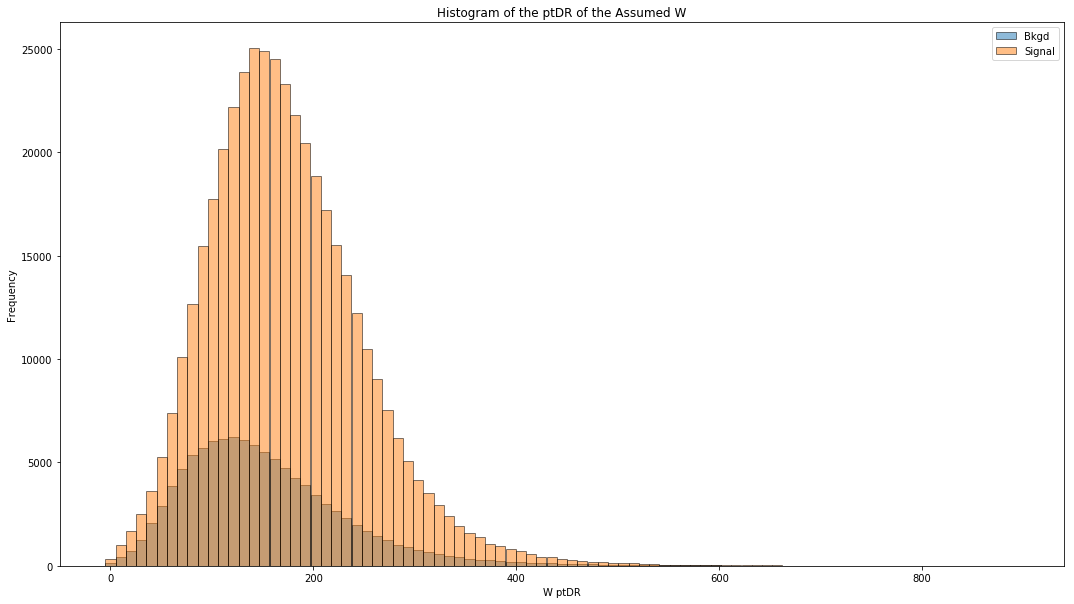

In [29]:
fig, ax = plt.subplots()
bins = np.linspace(0, 900, 90)
bhist = np.histogram(cut_bkgd["W ptDR"], bins=bins)
shist = np.histogram(cut_signal["W ptDR"], bins=bins)
plt.bar(bhist[1][:-1], bhist[0]/4, width=10, alpha=0.5, label="Bkgd", edgecolor="black")
plt.bar(shist[1][:-1], shist[0], width=10, alpha=0.5, label="Signal", edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("W ptDR")
ax.set_title("Histogram of the ptDR of the Assumed W")
plt.legend(loc='upper right')
fig.set_size_inches(18, 10)